In [1]:
import pandas as pd

In [2]:
tennis_data = pd.read_csv('./data/playtennis.csv')

In [3]:
tennis_data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
outlook_map = {'Sunny' : 0, 'Overcast' : 1, 'Rain' : 2}

In [5]:
tennis_data.Outlook = tennis_data.Outlook.replace(outlook_map)

In [6]:
tennis_data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes


In [7]:
temperature_map = {'Hot' : 1, 'Mild' : 2, 'Cool' : 3}

In [8]:
humidity_map = {'High' : 0, 'Normal' : 2}

In [9]:
wind_map = {'Weak' : 1, 'Strong' : 2}

In [10]:
play_tennis_map = {'No' : 1, 'Yes' : 2}

In [11]:
tennis_data.Temperature = tennis_data.Temperature.replace(temperature_map)
tennis_data.Humidity = tennis_data.Humidity.replace(humidity_map)
tennis_data.Wind = tennis_data.Wind.replace(wind_map)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace(play_tennis_map)

In [12]:
tennis_data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,0,1,1
1,0,1,0,2,1
2,1,1,0,1,2
3,2,2,0,1,2
4,2,3,2,1,2


In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt_clf = DecisionTreeClassifier()

In [15]:
X = tennis_data.loc[:, 'Outlook' : 'Wind']

In [16]:
y = tennis_data['PlayTennis']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [19]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
dt_prediction = dt_clf.predict(X_test)

In [21]:
dt_clf.score(X_train, y_train)

1.0

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy = accuracy_score(y_test, dt_prediction)

In [24]:
accuracy

0.75

In [25]:
from sklearn import tree

In [26]:
dt_dot_data = tree.export_graphviz(dt_clf,
                                   out_file = None,
                                   feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind'],
                                   class_names = ['No', 'Yes'],
                                   filled = True,
                                   rounded = True,
                                   special_characters= True)

In [27]:
import pydotplus

In [28]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [29]:
dt_graph

In [30]:
from IPython.display import Image

In [31]:
# !dot -c

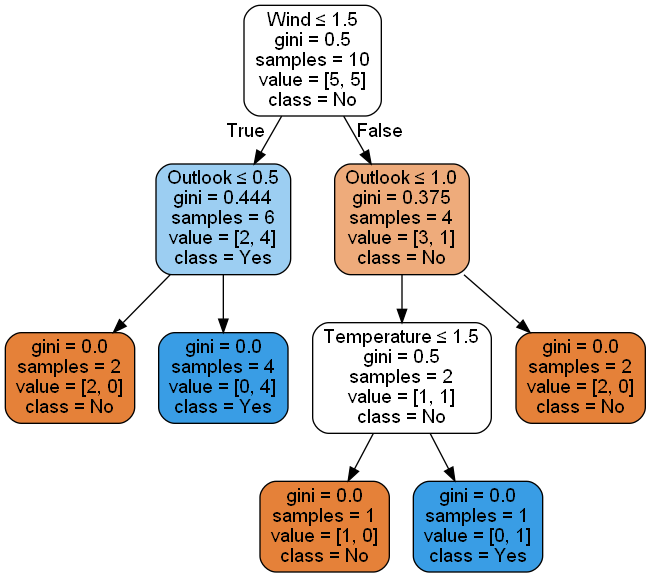

In [32]:
Image(dt_graph.create_png())